12612


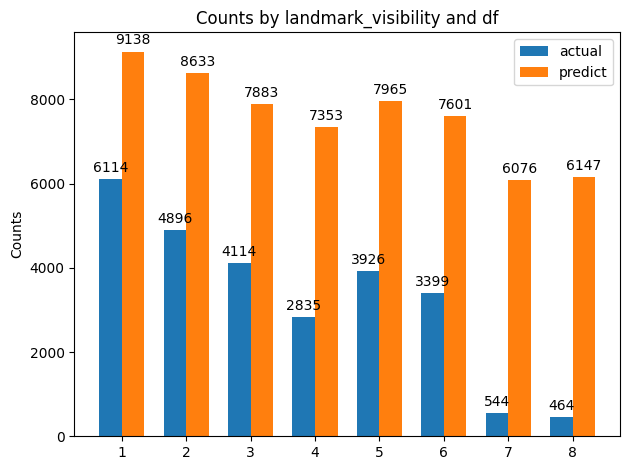

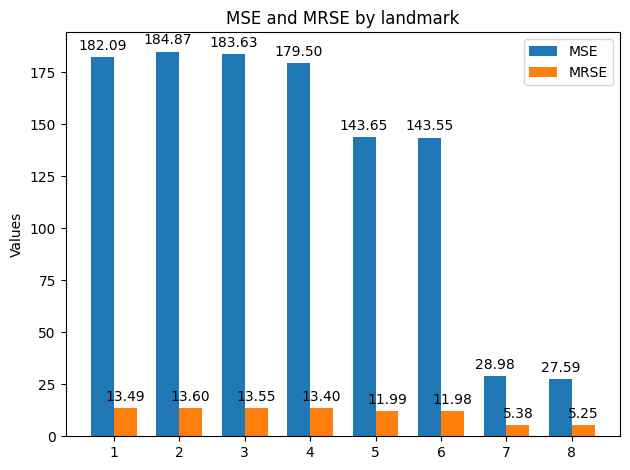

Landmark 1: Accuracy = 69.14050111005392%, MSE = 1.4438219974653492%, MRSE = 0.10699533579952183%
Landmark 2: Accuracy = 68.91849032667301%, MSE = 1.4657881996405138%, MRSE = 0.10780617303964024%
Landmark 3: Accuracy = 69.3545829368855%, MSE = 1.4560096561765037%, MRSE = 0.10744597386226763%
Landmark 4: Accuracy = 68.98192197906755%, MSE = 1.423266561108189%, MRSE = 0.10623096874793263%
Landmark 5: Accuracy = 69.37044084998413%, MSE = 1.139021138754074%, MRSE = 0.0950328844029049%
Landmark 6: Accuracy = 69.3545829368855%, MSE = 1.138201335444503%, MRSE = 0.09499867858615357%
Landmark 7: Accuracy = 69.41008563273073%, MSE = 0.22981023112518556%, MRSE = 0.04268671148238464%
Landmark 8: Accuracy = 68.88677450047574%, MSE = 0.21879569586162284%, MRSE = 0.04165118924670252%


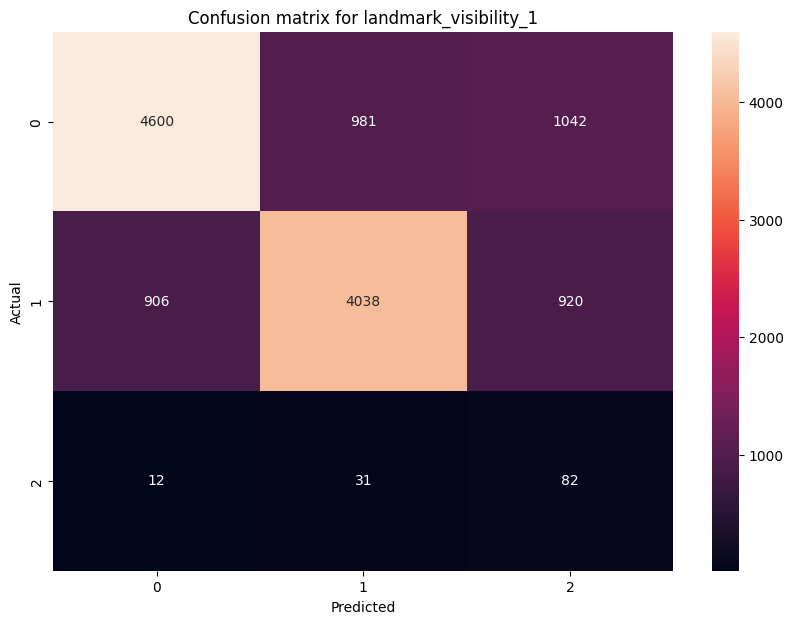

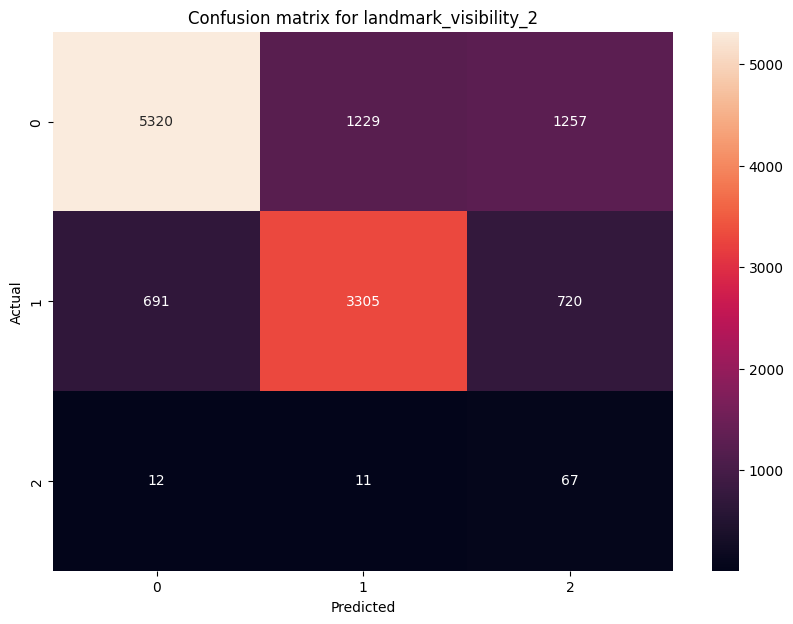

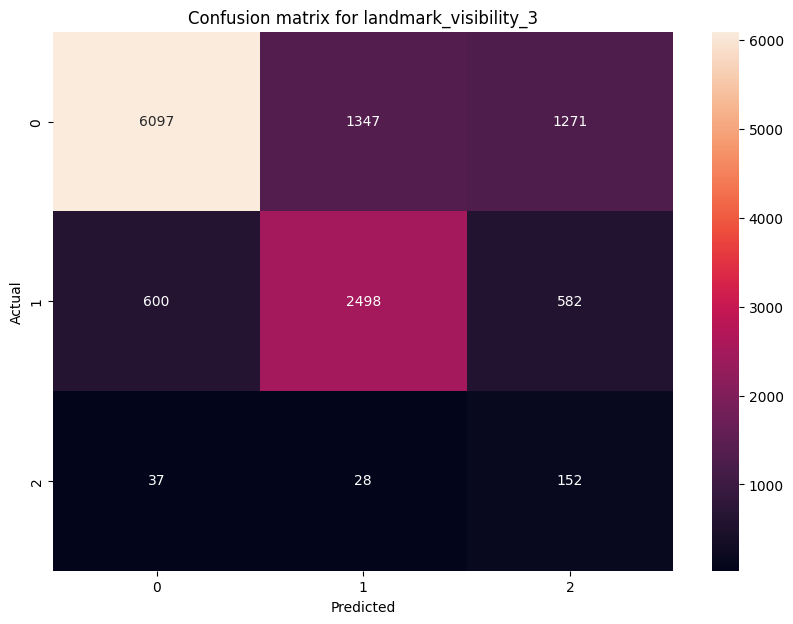

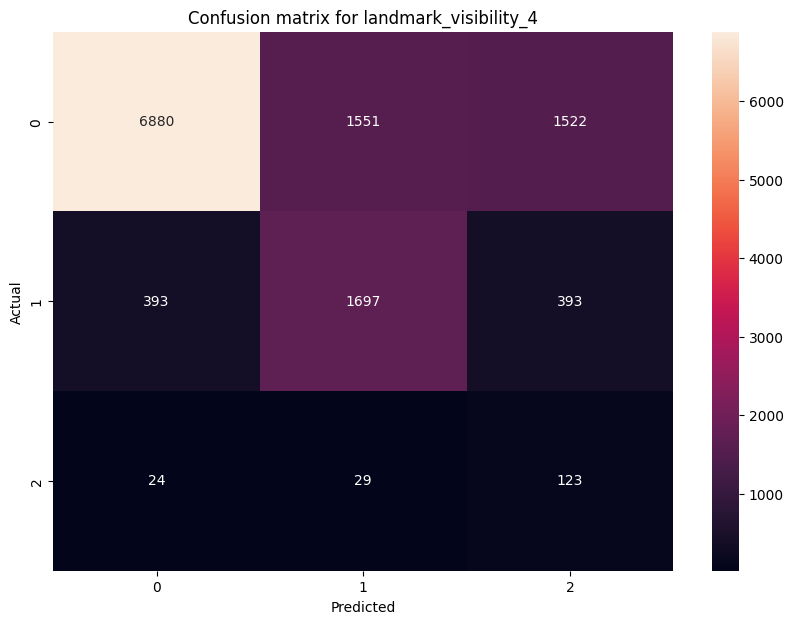

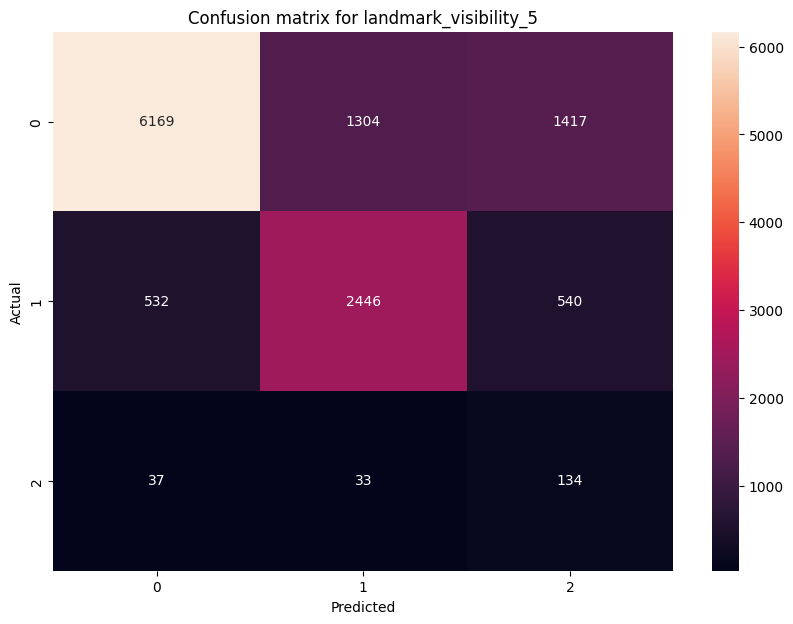

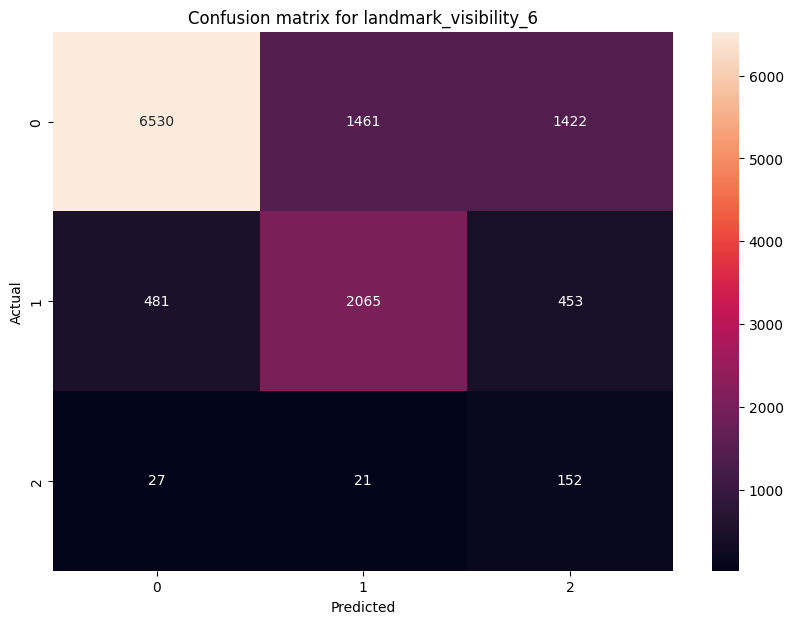

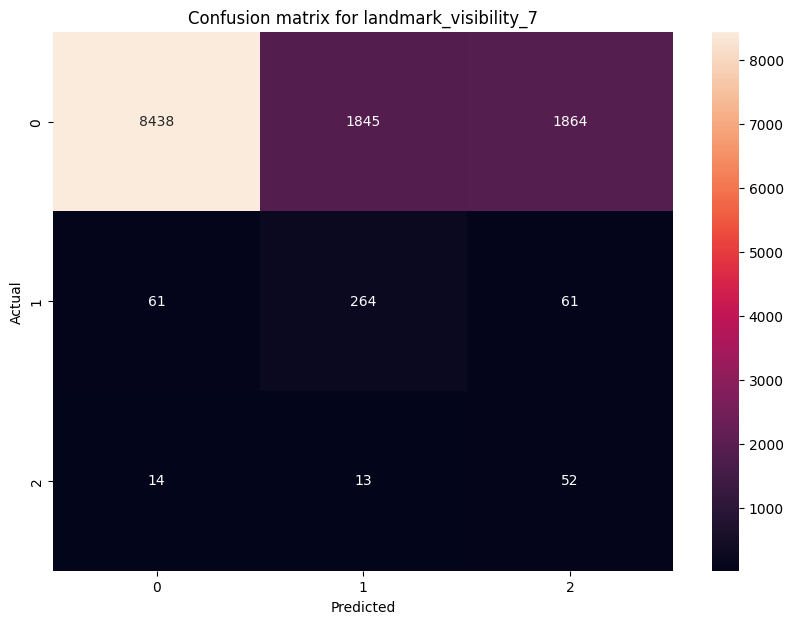

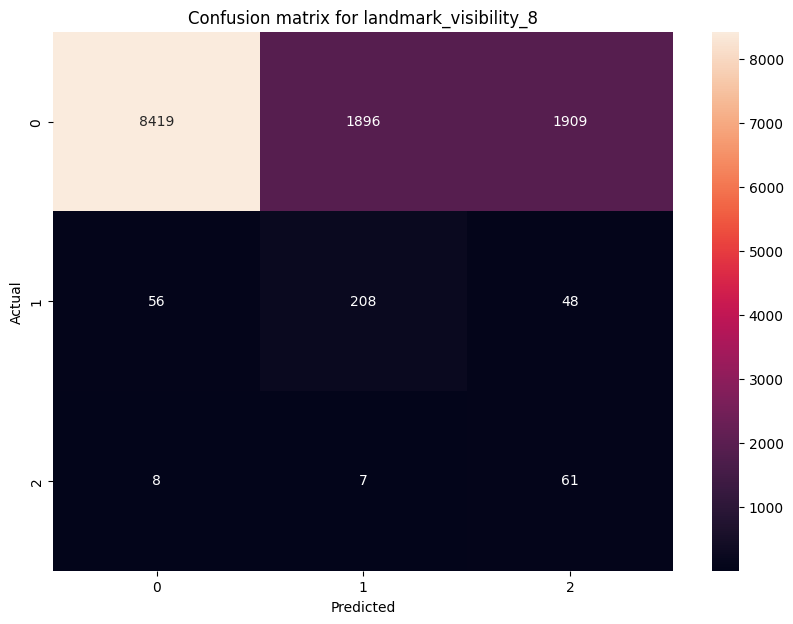

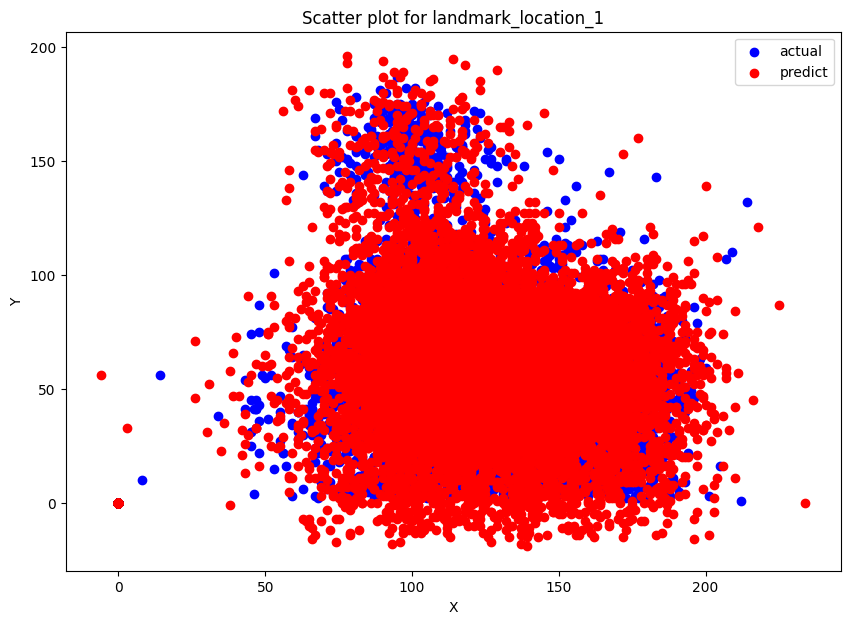

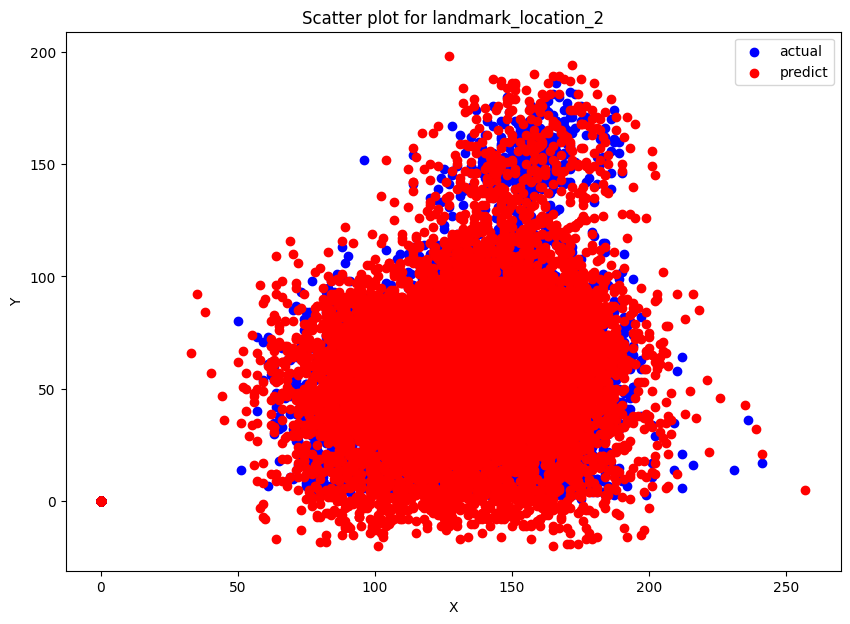

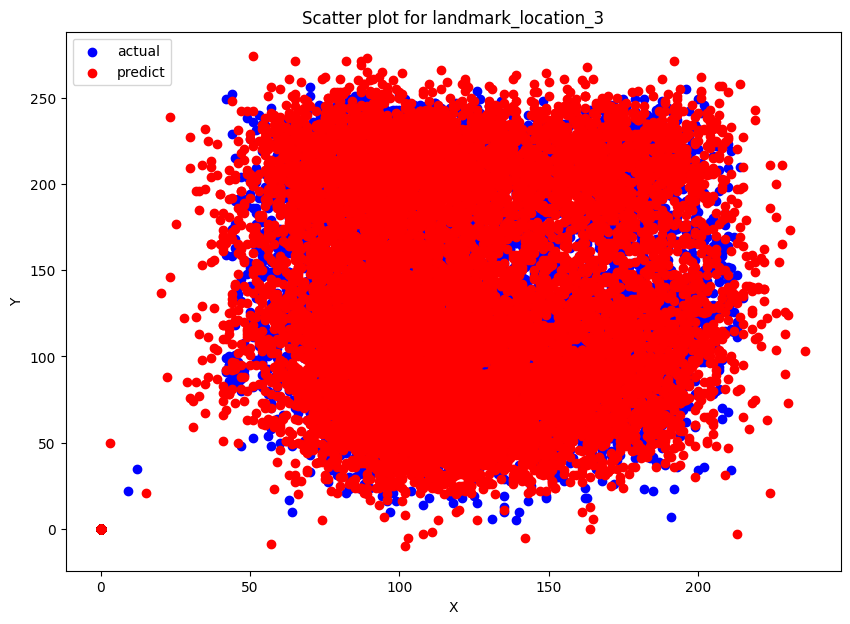

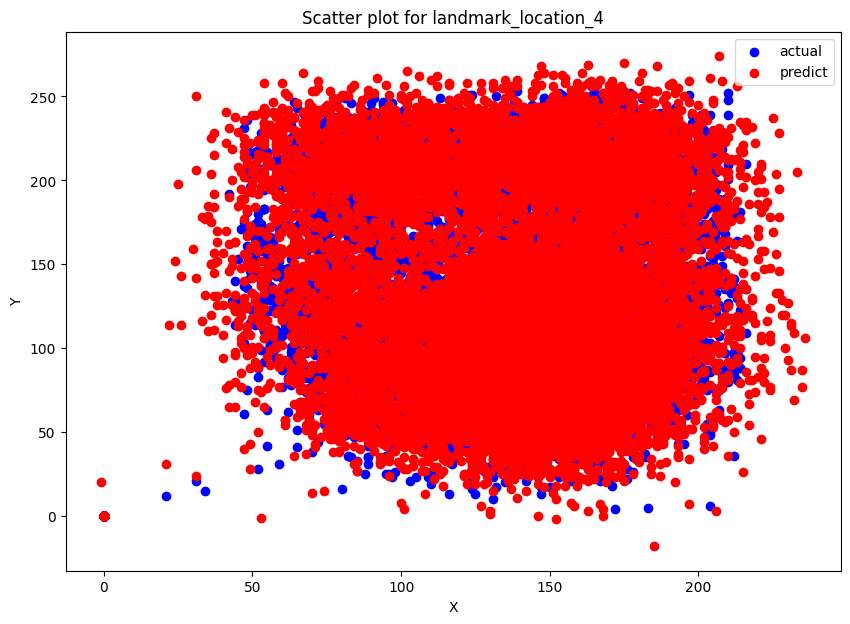

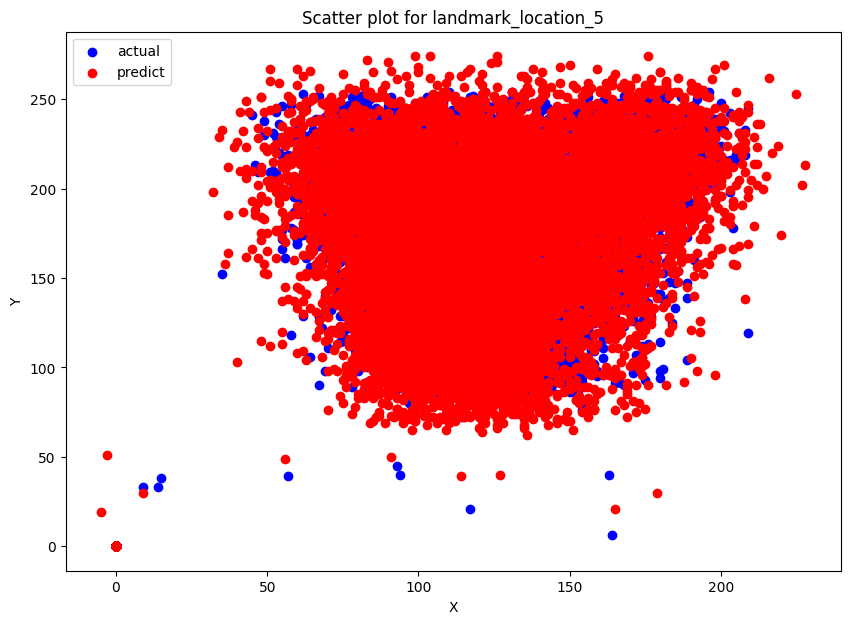

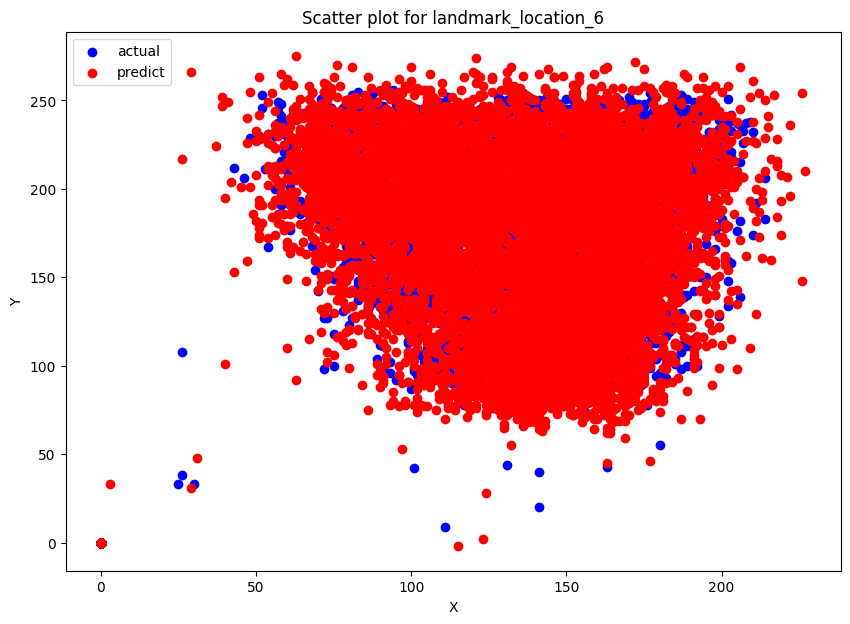

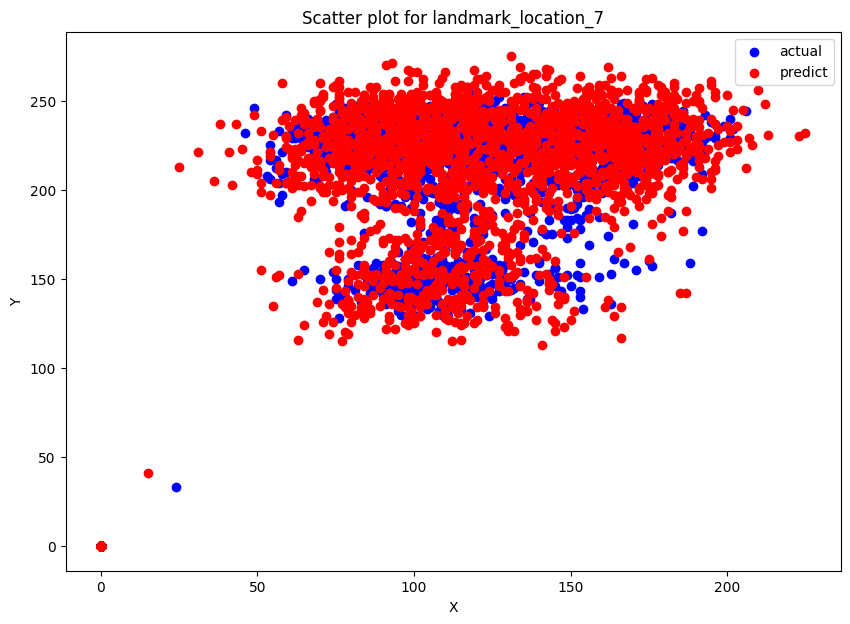

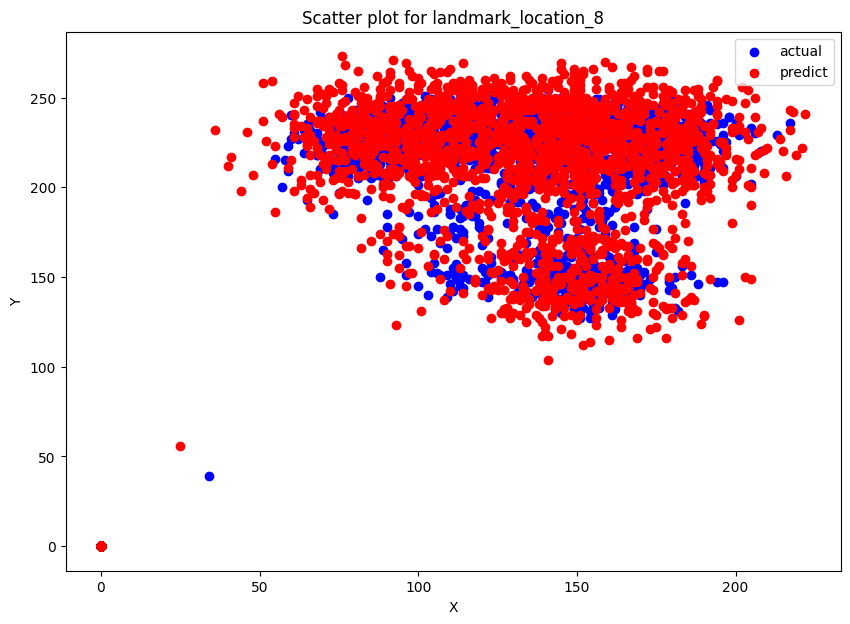

In [18]:
# read data-1705449884624.csv using pandas
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

# read csv file
file = "data-1705449884624.csv"
df = pd.read_csv(file, sep=',', header=0)

print(len(df))
new_df = df.copy()
visibility_rate = [1]*77 + [0]*23
localtion_max = 23

# actual_visibility = [0]*8
# predict_visibility = [0]*8
for k in range(0, len(df)):
    # new_visibility = [0]*8
    for i in range(1, 9):
        choice = random.choices(visibility_rate)
        curent_value = df.loc[k, 'landmark_visibility_'+str(i)]
        if choice[0] == 0:
            new_df.loc[k, 'landmark_visibility_'+str(i)] = curent_value
        else:
            new_df.loc[k, 'landmark_visibility_'+str(i)] = random.choice([curent_value]*40+[0]*20+[1]*20+[2]*20)


    for i in range(1, 9):
        x = df.loc[k, 'landmark_location_x_'+str(i)]
        y = df.loc[k, 'landmark_location_y_'+str(i)]
        if x == 0 and y == 0:
            continue
        rand_int = random.randint(-localtion_max, localtion_max)
        new_df.loc[k, 'landmark_location_x_'+str(i)] = df.loc[k, 'landmark_location_x_'+str(i)] + rand_int

        rand_int = random.randint(-localtion_max, localtion_max)
        new_df.loc[k, 'landmark_location_y_'+str(i)] = df.loc[k, 'landmark_location_y_'+str(i)] + rand_int

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        # Check if height is integer
        if height.is_integer():
            label = '{}'.format(int(height))
        else:
            label = '{:.2f}'.format(height)
        ax.annotate(label,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
import matplotlib.pyplot as plt

# Calculate the counts of landmark_visibility for each value from 0 to 8 for df
df_counts = [df['landmark_visibility_'+str(i)].sum() for i in range(1,9)]

# Calculate the counts of landmark_visibility for each value from 0 to 8 for new_df
new_df_counts = [new_df['landmark_visibility_'+str(i)].sum() for i in range(1,9)]

# Define the label locations and width of the bars
x = np.arange(8)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Generate bars for df and new_df counts
rects1 = ax.bar(x - width/2, df_counts, width, label='actual')
rects2 = ax.bar(x + width/2, new_df_counts, width, label='predict')
autolabel(rects1)
autolabel(rects2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts by landmark_visibility and df')
ax.set_xticks(x)
ax.set_xticklabels([''+str(i) for i in range(1,9)])
ax.legend()

fig.tight_layout()

plt.show()


from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate MSE and MRSE for each landmark
mse_values = []
mrse_values = []
for i in range(1, 9):
    mse = mean_squared_error(df['landmark_location_x_'+str(i)], new_df['landmark_location_x_'+str(i)])
    mse_values.append(mse)
    mrse_values.append(sqrt(mse))

# Define the label locations and width of the bars
x = np.arange(8)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Generate bars for MSE and MRSE
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mrse_values, width, label='MRSE')
autolabel(rects1)
autolabel(rects2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('MSE and MRSE by landmark')
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in range(1,9)])
ax.legend()

fig.tight_layout()

plt.show()


# Calculate accuracy, MSE and MRSE for each landmark
accuracy_values = []
mse_percent_values = []
mrse_percent_values = []
for i in range(1, 9):
    accuracy = (df['landmark_visibility_'+str(i)] == new_df['landmark_visibility_'+str(i)]).sum() / len(df) * 100
    accuracy_values.append(accuracy)
    
    mse = mean_squared_error(df['landmark_location_x_'+str(i)], new_df['landmark_location_x_'+str(i)])
    mse_percent = mse / len(df) * 100
    mse_percent_values.append(mse_percent)
    
    mrse = sqrt(mse)
    mrse_percent = mrse / len(df) * 100
    mrse_percent_values.append(mrse_percent)

# Print accuracy, MSE and MRSE percentages
for i in range(8):
    print(f'Landmark {i+1}: Accuracy = {accuracy_values[i]}%, MSE = {mse_percent_values[i]}%, MRSE = {mrse_percent_values[i]}%')


from sklearn.metrics import confusion_matrix
import seaborn as sns

# For each label
for i in range(1, 9):
    # Calculate confusion matrix
    cm = confusion_matrix(df['landmark_visibility_'+str(i)], new_df['landmark_visibility_'+str(i)])
    
    # Plot confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion matrix for landmark_visibility_'+str(i))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # # Plot scatter plot
    # plt.figure(figsize=(10,7))
    # plt.scatter(df.index, df['landmark_visibility_'+str(i)], color='blue', label='actual')
    # plt.scatter(new_df.index, new_df['landmark_visibility_'+str(i)], color='red', label='predict')
    # plt.title('Scatter plot for landmark_visibility_'+str(i))
    # plt.xlabel('Index')
    # plt.ylabel('Visibility')
    # plt.legend()
    # plt.show()

# For each label
for i in range(1, 9):
    # Plot scatter plot
    plt.figure(figsize=(10,7))
    plt.scatter(df['landmark_location_x_'+str(i)], df['landmark_location_y_'+str(i)], color='blue', label='actual')
    plt.scatter(new_df['landmark_location_x_'+str(i)], new_df['landmark_location_y_'+str(i)], color='red', label='predict')
    plt.title('Scatter plot for landmark_location_'+str(i))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()